In [1]:
import re
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

### Read the raw analyst rating file ###

In [5]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv')

# Display the first few rows of the data
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

### Descriptive statistics 

Descriptive Statistics for Headline Lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


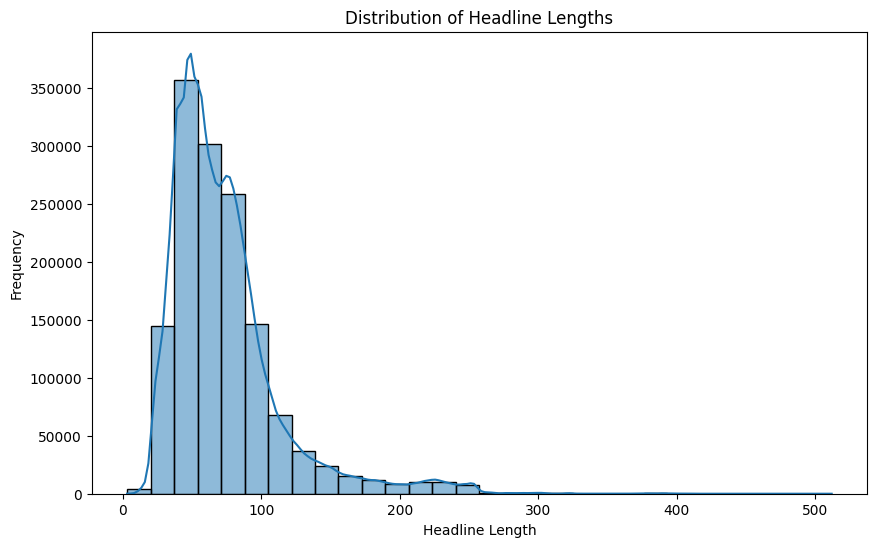


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


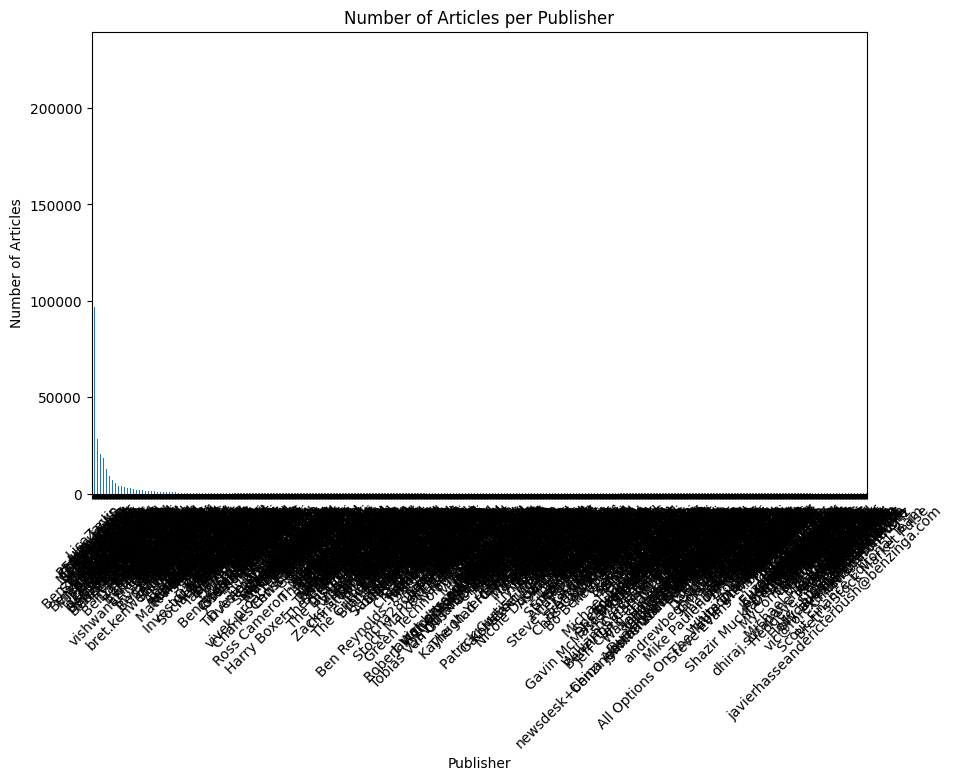


Number of Articles Published Over Time:
publication_date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-05-30     14
2020-05-31     17
2020-06-01    205
2020-06-02    183
2020-06-03     69
Length: 3946, dtype: int64


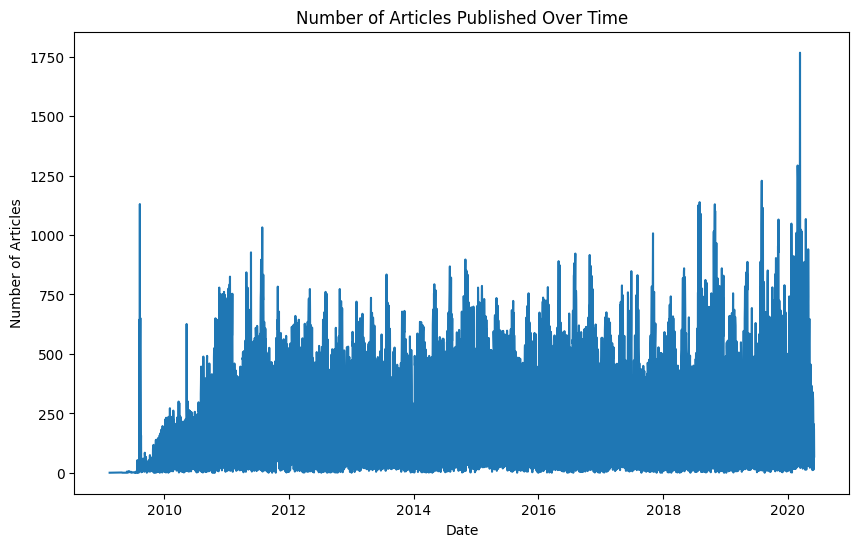


Number of Articles by Day of the Week:
day_of_week
Monday       254842
Tuesday      285468
Wednesday    289049
Thursday     289907
Friday       208511
Saturday       7486
Sunday        16078
Name: count, dtype: int64


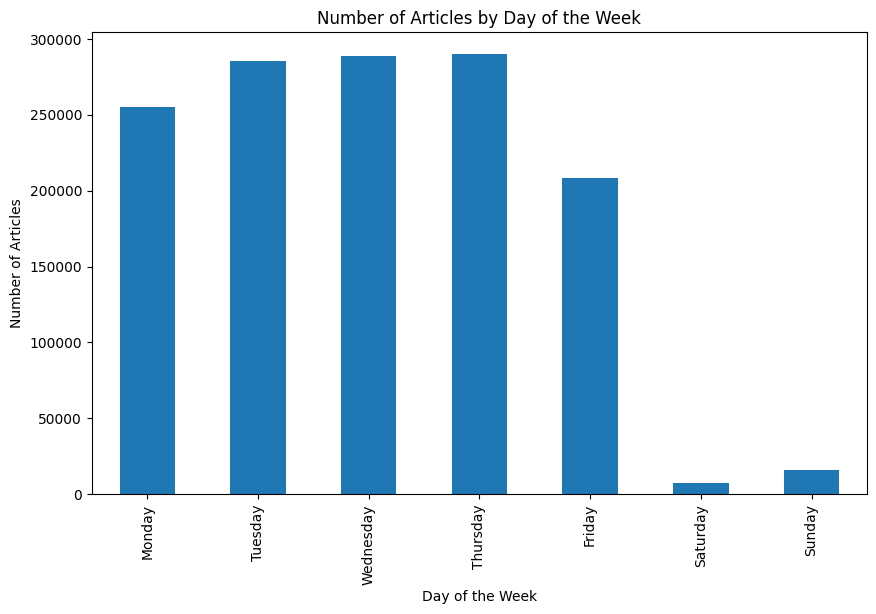

In [6]:
# Convert the date column to datetime format
# Using format='%Y-%m-%d %H:%M:%S' to match the data format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Task 1: Descriptive Statistics for textual lengths (like headline length)
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Descriptive Statistics for Headline Lengths:")
print(headline_stats)

# Visualize the distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

# Task 2: Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)

# Visualize the number of articles per publisher
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar')
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Task 3: Analyze publication dates to see trends over time
# Extracting the date part (ignoring the time)
df['publication_date'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()

# Group by date to get the number of articles per day
articles_per_day = df.groupby('publication_date').size()

print("\nNumber of Articles Published Over Time:")
print(articles_per_day)

# Visualize the number of articles over time
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='line')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Analyze the number of articles by day of the week
articles_by_day = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nNumber of Articles by Day of the Week:")
print(articles_by_day)

# Visualize the number of articles by day of the week
plt.figure(figsize=(10, 6))
articles_by_day.plot(kind='bar')
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()


### Time series Analysis

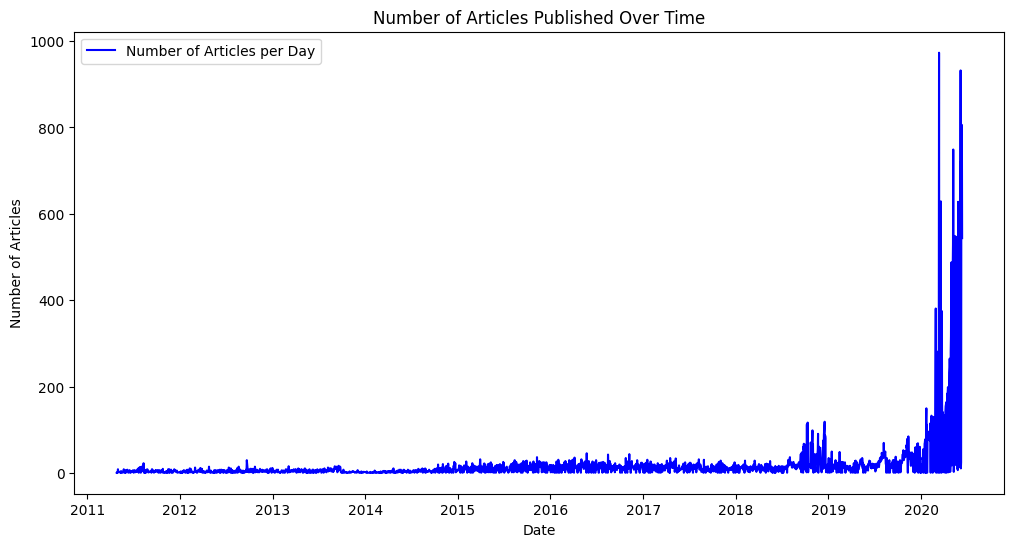

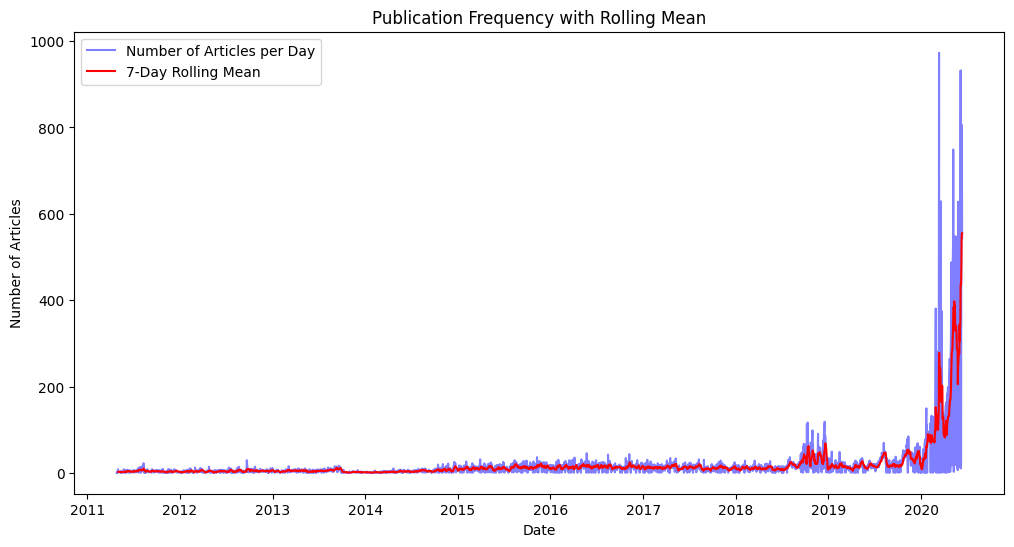

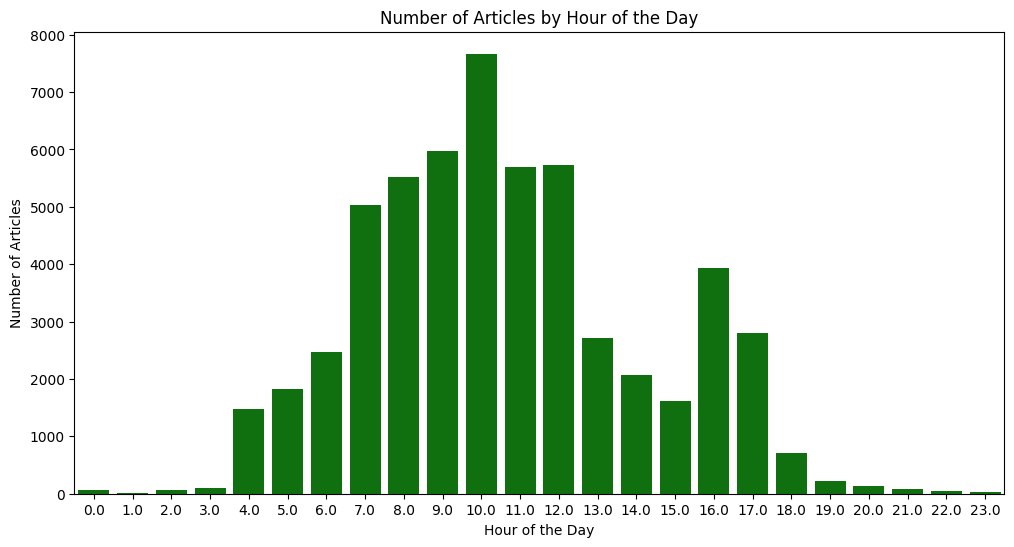

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv')

# Convert the date column to datetime format with timezone information
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

# Task 1: Analyze publication frequency over time
# Group by date to get the number of articles per day
df['publication_date'] = df['date'].dt.date
articles_per_day = df.groupby('publication_date').size()

# Visualize the number of articles published over time
plt.figure(figsize=(12, 6))
plt.plot(articles_per_day, label='Number of Articles per Day', color='blue')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

# Task 2: Identify spikes in publication frequency
# Rolling mean to smooth the series and detect spikes
rolling_mean = articles_per_day.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(articles_per_day, label='Number of Articles per Day', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='7-Day Rolling Mean', color='red')
plt.title('Publication Frequency with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

# Task 3: Analyze the time of day when most news is released
df['time_of_day'] = df['date'].dt.hour

# Count the number of articles published at each hour of the day
articles_by_hour = df['time_of_day'].value_counts().sort_index()

# Visualize the number of articles by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x=articles_by_hour.index, y=articles_by_hour.values, color='green')
plt.title('Number of Articles by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()


## Publisher Analysis


Top Publishers by Number of Articles:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_11880\3983753535.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(10).index, y=publisher_counts.head(10).values, palette='viridis')


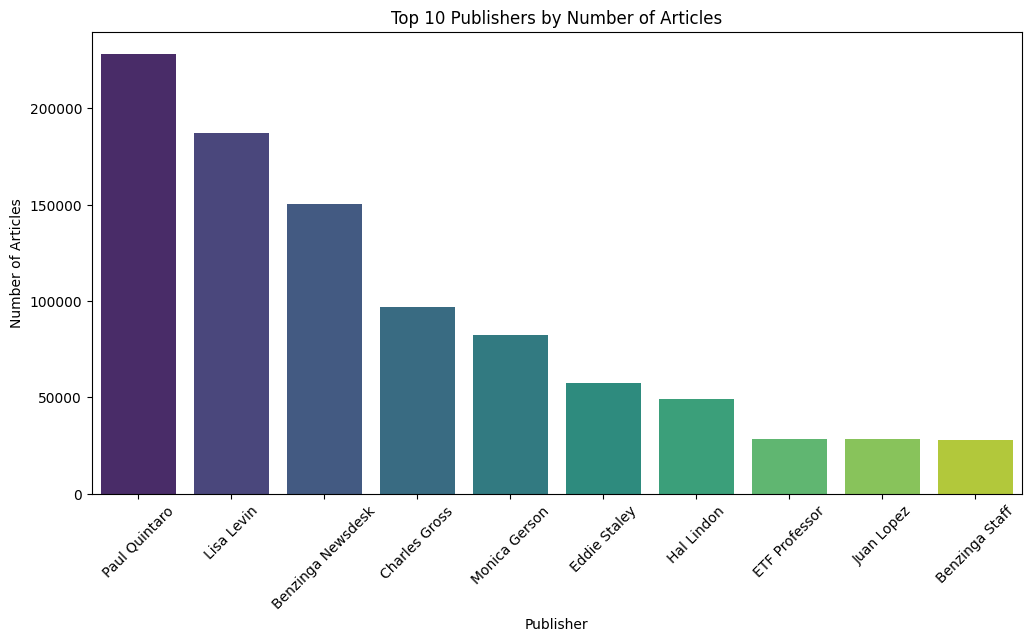


News Type Distribution by Top Publishers:
news_type          Earnings  Mergers   Other  Stock Movements
publisher                                                    
Benzinga Newsdesk      3649     1040   84618            61177
Benzinga Staff         2090      530   22053             3441
Charles Gross         10309     1713   73242            11468
ETF Professor           589       64   26406             1430
Eddie Staley           3226      972   39376            13680
Hal Lindon             1718      995   38592             7742
Juan Lopez               20       20   15123            13275
Lisa Levin            20269      759   96881            69070
Monica Gerson         20404      167   33592            28217
Paul Quintaro         18712     2226  163818            43617


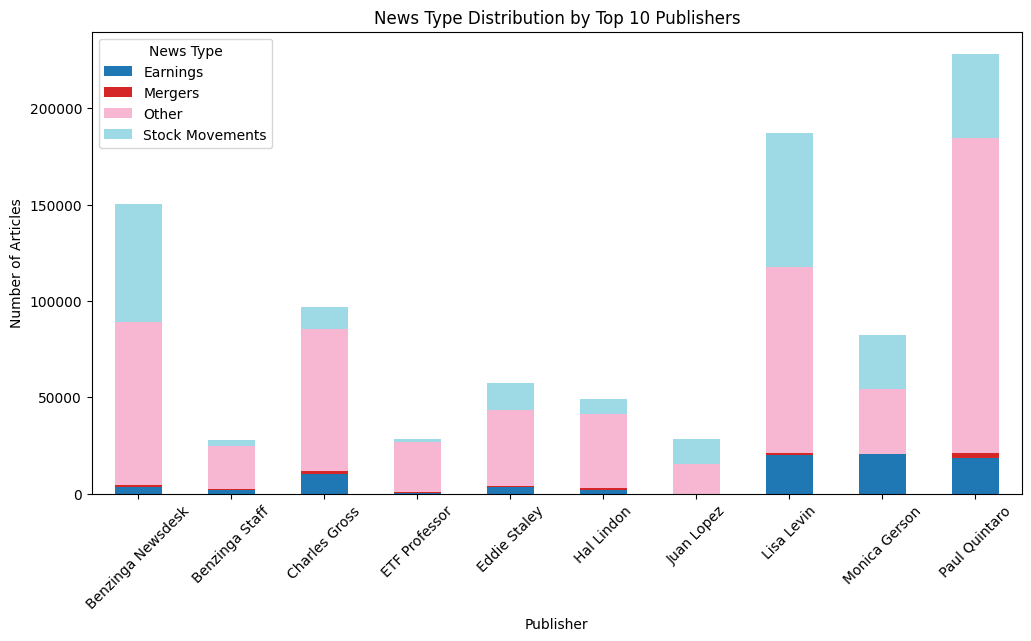


Top Domains by Number of Articles:
publisher_domain
Unknown                   1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_11880\3983753535.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_counts.head(10).index, y=domain_counts.head(10).values, palette='magma')


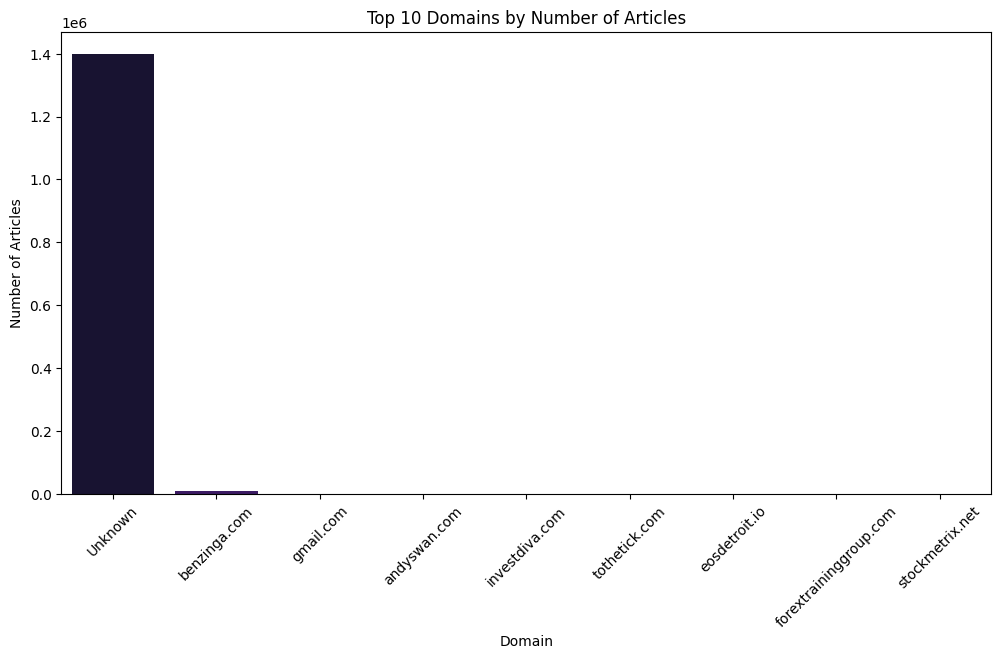

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\raw_analyst_ratings.csv\raw_analyst_ratings.csv')

# Convert the date column to datetime format with timezone information
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

# Task 1: Analyze which publishers contribute most to the news feed
publisher_counts = df['publisher'].value_counts()

print("\nTop Publishers by Number of Articles:")
print(publisher_counts.head(10))

# Visualize the top 10 publishers by the number of articles
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.head(10).index, y=publisher_counts.head(10).values, palette='viridis')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

# Task 2: Analyze the type of news reported by top publishers
# This would require additional data or assumptions about the type of news, such as tagging headlines with categories (e.g., earnings, mergers, etc.)
# For the sake of example, let's categorize news based on keywords in headlines
keywords = {
    'Earnings': ['earnings', 'profit', 'revenue'],
    'Mergers': ['merger', 'acquisition', 'buyout'],
    'Stock Movements': ['high', 'low', 'price target', 'downgrade', 'upgrade'],
    # Add more categories as needed
}

# Create a new column for news type based on keywords
df['news_type'] = 'Other'
for news_type, kw_list in keywords.items():
    for kw in kw_list:
        df.loc[df['headline'].str.contains(kw, case=False, na=False), 'news_type'] = news_type

# Analyze the distribution of news types by top publishers
top_publishers = publisher_counts.head(10).index
news_type_by_publisher = df[df['publisher'].isin(top_publishers)].groupby(['publisher', 'news_type']).size().unstack().fillna(0)

print("\nNews Type Distribution by Top Publishers:")
print(news_type_by_publisher)

# Visualize the distribution of news types by top publishers
news_type_by_publisher.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('News Type Distribution by Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.legend(title='News Type')
plt.show()

# Task 3: Identify unique email domains if publishers are emails
# Extract the domain from email addresses in the publisher column
df['publisher_domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else 'Unknown')

# Count the number of articles by domain
domain_counts = df['publisher_domain'].value_counts()

print("\nTop Domains by Number of Articles:")
print(domain_counts.head(10))

# Visualize the top domains by number of articles
plt.figure(figsize=(12, 6))
sns.barplot(x=domain_counts.head(10).index, y=domain_counts.head(10).values, palette='magma')
plt.title('Top 10 Domains by Number of Articles')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
